In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard-data/Creditcard_data.csv


In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/kaggle/input/creditcard-data/Creditcard_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<Axes: xlabel='Class', ylabel='count'>

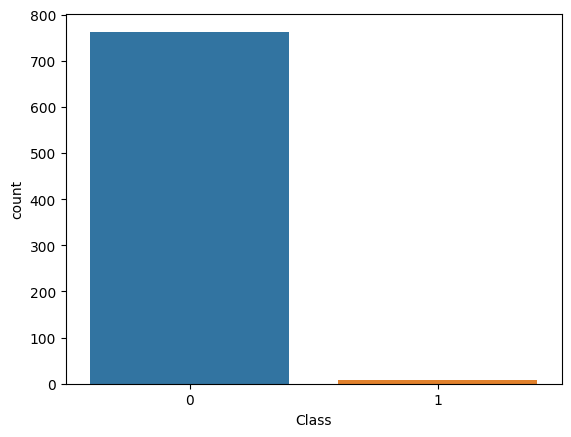

In [7]:
sns.countplot(data= df, x= 'Class')

In [8]:
df['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

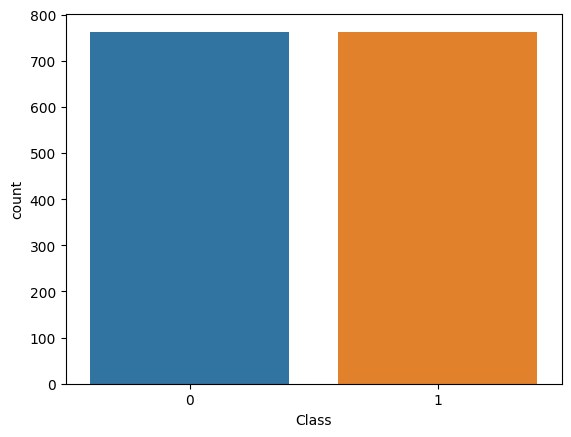

In [9]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [10]:
resampled_df['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

In [11]:
z= 1.96
p= 0.5
E= 0.05

In [12]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [13]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,508,1.335369,0.535982,-0.448156,0.902998,0.517134,-0.694213,0.590279,-0.348319,-0.344490,...,-0.042465,-0.021676,-0.259350,-0.412243,0.991928,-0.247183,-0.003841,0.004311,2.27,0
1,370,1.354445,-0.815297,0.836498,-0.617140,-1.304124,-0.025274,-1.147177,0.162996,-0.258341,...,0.292038,0.941357,-0.192851,0.049422,0.597416,0.002149,0.035182,0.003682,4.79,0
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
3,534,-1.393265,-1.095569,2.607795,-2.529060,-0.135265,-0.373239,0.221446,-0.962847,-1.304498,...,-0.281365,0.563218,-0.129765,0.089264,0.317551,-0.288551,-0.863521,-0.519168,25.00,0
4,237,-0.473290,0.479627,1.528538,-0.098185,-0.005520,-0.773256,0.668000,-0.030046,0.058420,...,-0.143163,-0.413838,-0.038397,0.399344,0.114656,0.121233,-0.044413,0.002269,32.51,0


In [14]:
sample_size= len(resampled_df)//5
sample_size


305

In [15]:
k=5
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


In [16]:
z= 1.96
p= 0.7
E= 0.01
S= 2

In [17]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

32269

In [18]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)
stratified_sample.head()

/tmp/ipykernel_19/647574193.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,322,1.202007,0.108213,0.591724,0.566079,-0.641573,-0.816974,-0.127403,0.004375,-0.026148,...,-0.207683,-0.703844,0.165350,0.493736,0.114822,0.068947,-0.041350,0.008041,1.79,0
1,125,-0.724910,0.073475,1.739547,0.758588,0.229543,2.422069,0.196688,0.861076,0.099102,...,0.188696,0.738515,0.145933,-1.032186,-0.087511,-0.221063,0.108168,0.011785,113.00,0
2,307,-2.658288,-3.014776,2.271636,-1.218204,1.546541,-1.682064,-1.524913,0.088425,-0.761266,...,-0.212736,-0.587618,0.320804,-0.013227,-0.233772,0.742313,-0.505256,0.394053,52.90,0
3,147,0.912979,-0.653000,0.298165,0.209546,-0.197231,0.971100,-0.449461,0.281896,0.262493,...,0.089258,-0.077306,-0.237707,-1.301415,0.179599,0.469956,-0.024739,0.028338,170.43,0
4,95,-0.343711,1.118615,1.293386,0.064762,0.023481,-0.992741,0.695814,-0.064809,-0.373640,...,-0.265392,-0.700550,-0.014280,0.330615,-0.165442,0.072342,0.244882,0.098048,2.28,0


In [19]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [20]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [21]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
2,487,-0.517981,0.723072,1.401196,0.772313,0.671651,0.847780,0.352294,0.224071,-2.314242,...,-0.374926,-0.737659,-0.391401,-1.420024,0.435491,0.192061,0.051327,0.052402,7.48,0
3,448,-0.242497,0.891170,1.164787,1.025392,0.729123,0.663501,0.760560,-0.004531,0.037370,...,-0.161343,0.047255,-0.302695,-0.931315,-0.008611,-0.187111,0.259246,-0.030635,11.99,0
4,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1064,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1065,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1066,145,1.122579,0.222573,0.481928,1.131375,-0.214947,-0.201283,-0.056556,0.087471,-0.250570,...,0.163223,0.492048,-0.068450,0.233485,0.532600,-0.281097,0.028326,0.010990,9.90,0


In [22]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,483,1.039674,-0.329296,1.073431,1.547480,-0.595510,1.090970,-0.703763,0.511730,1.176992,...,-0.391770,-0.761528,0.035646,-0.329862,0.399210,-0.504260,0.078070,0.014683,20.74,0
1,388,-0.517234,0.599241,2.913950,0.374994,-0.453371,-0.407893,0.653326,-0.337756,0.713252,...,-0.016612,0.394598,-0.151037,0.896232,-0.335150,-0.680062,-0.286109,-0.298699,12.99,0
2,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
3,514,-0.878340,0.489031,2.914341,0.078154,-0.423732,0.090021,0.289963,0.085451,0.040902,...,-0.037353,0.236372,-0.197062,0.584250,0.190462,0.305561,0.122975,-0.088435,36.61,0
4,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
454,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
455,225,1.478773,-0.551089,-0.523152,-0.831153,-0.195413,-0.289193,-0.279252,-0.205606,-0.647806,...,0.071144,0.210635,-0.356278,-0.954151,0.963445,0.019195,-0.016289,-0.006384,34.00,0
456,559,1.169778,0.351227,-0.257897,1.002975,0.431220,-0.181795,0.395080,-0.049969,-0.585228,...,0.072416,0.214930,-0.184748,-0.300332,0.778691,-0.249624,-0.000996,-0.002365,22.24,0


In [23]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

In [24]:
z= 1.96
p= 0.5
E= 0.05
C= 50

In [25]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
sample_size

960400

In [26]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [27]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [28]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,496,-0.652955,0.493216,1.246770,-0.707569,0.165764,-1.146224,0.932049,-0.094962,-0.861258,...,-0.209224,-0.894706,0.167075,0.528922,-0.419801,0.629628,-0.040930,0.097624,50.99,0
1,260,1.026702,-0.661665,0.897601,0.144403,-1.105205,0.020245,-0.707267,0.195918,0.743371,...,0.150661,0.322398,-0.154736,0.097655,0.174639,1.103205,-0.060709,0.016598,99.00,0
2,330,-0.386633,0.953379,1.851726,1.623108,-0.603151,0.204916,0.438894,-0.313317,0.359461,...,0.141432,0.996964,-0.205808,0.481312,-0.224335,-0.105636,-0.104202,-0.070726,55.76,0
3,167,-1.329062,1.955890,1.118275,2.318432,1.582537,0.389937,-1.287306,-1.323919,-1.050321,...,1.286969,-1.261980,-1.732848,-0.792373,-0.775038,-0.048443,0.783109,0.404478,5.42,0
4,32,-2.008872,2.198527,0.144242,1.159432,-0.815174,0.182288,-0.617108,1.530817,-0.586832,...,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
996,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
997,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
998,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [29]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [30]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [31]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1,257,-0.599318,0.887525,1.579214,-0.113728,0.304991,-0.182829,0.503722,0.241375,-0.722596,...,-0.137631,-0.524586,-0.057729,-0.058980,-0.320342,0.089180,0.058979,0.098448,1.98,0
2,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
3,559,-0.689943,0.115396,0.619568,-2.256789,0.985793,-0.667986,1.631148,-0.939184,1.896690,...,-0.200851,0.485565,-0.427692,-0.510044,-0.109330,-0.906514,-0.318317,-0.599255,50.20,0
4,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1522,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1523,322,1.066134,0.037699,0.169035,0.991432,-0.354437,-0.143978,-0.293181,0.220900,0.450282,...,-0.087929,-0.097530,-0.057188,0.138768,0.379478,0.412382,0.005041,0.032502,29.56,0
1524,259,1.095067,-0.014393,1.408552,1.266546,-0.944751,0.029578,-0.598515,0.175291,0.485231,...,0.013107,0.248009,-0.002564,0.570100,0.387137,-0.442319,0.074531,0.032215,9.99,0


In [32]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
sv_model= SVC(random_state=42)
xg_model= XGBClassifier(random_state=42)

In [33]:
models= [sv_model,xg_model,lr_model,knn_model,rf_model]
model_names= ['SVM','XGBOOST','Logistic Regression','KNN','Random Forest']

In [34]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [35]:
test_samples= []

In [36]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [37]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [38]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
SVM,0.5,0.5,0.5,0.5,0.5
XGBOOST,0.482533,0.593886,0.552402,0.550218,0.497817
Logistic Regression,0.762009,0.709607,0.759825,0.716157,0.716157
KNN,0.5,0.5,0.5,0.502183,0.502183
Random Forest,0.5,0.5,0.5,0.5,0.5
